<a href="https://colab.research.google.com/github/prashasthamulinti-blip/Lab1colabIHUB/blob/main/STP_Module_02_Lab_01_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 1: Basic Plots
---

# Introduction: Why Visualize Data?

It is often said, **"Data is only as good as it is presented."** Countless studies show how our brain is wired for the visual, processing images and patterns far faster than tables of numbers. Before we write a single line of code for a complex machine learning model, **visualizing the data is a critical first step**. It allows us to:

- Appreciate the scale and scope of our data.
- Interpret relationships, patterns, and distributions within the data.
- Visualize potential problems like outliers or missing values.

In this lab, you will learn simple yet powerful ways to **visualize your data using Python's most popular libraries**. Understanding these plots will help you decode the various features in a dataset and understand their impact on what you are trying to predict.



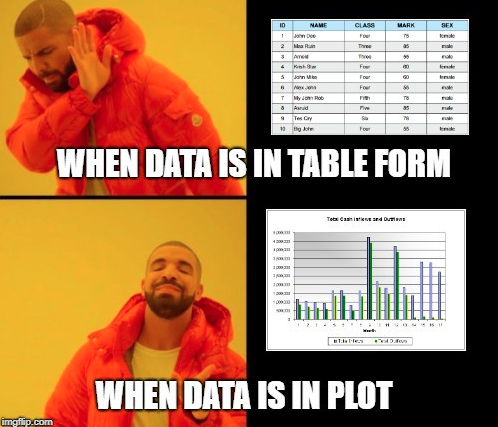

## Our Toolkit: Matplotlib and Seaborn

Data visualizations in Python can be done via many packages. We’ll start with **Matplotlib**, the foundational plotting library, and then move to **Seaborn**, which is built on top of Matplotlib and allows us to create more statistically-focused and aesthetically pleasing plots with less code.  

- **Matplotlib:**  
  It is a robust 2D plotting library that provides a high degree of control over every aspect of a figure. It's like having a full box of crayons, where you can draw and customize anything you want.

- **Seaborn:**  
  This is a higher-level library that simplifies the creation of common, informative statistical plots. It comes with beautiful default styles and palettes to make your charts look great right out of the box.


#### **Anatomy of a Matplotlib Figure**

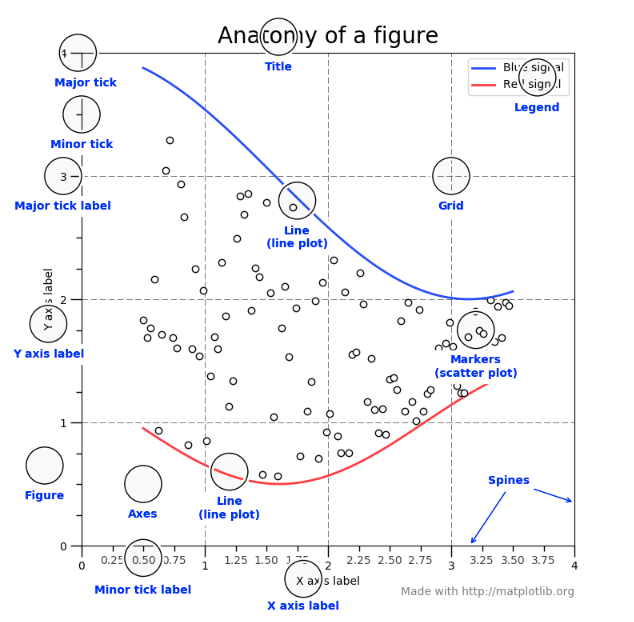

## Key Components of a Plot

- **Figure:**  
  The overall window or canvas on which everything is drawn. Think of it as the entire page.

- **Axes:**  
  The part of the figure that contains the actual plot(s). A figure can contain multiple axes.

- **Title:**  
  The main title of the Axes, describing what the plot represents.

- **X-axis and Y-axis:**  
  The horizontal (X) and vertical (Y) axes with labels that indicate what is being measured.

- **X-axis label & Y-axis label:**  
  Descriptive text for each axis to specify the variable being plotted.

- **Major ticks:**  
  The prominent tick marks along an axis, used to denote main divisions.

- **Minor ticks:**  
  Smaller tick marks that provide additional scale subdivisions between major ticks.

- **Major tick labels & Minor tick labels:**  
  Numeric or textual labels corresponding to the major and minor ticks.

- **Line (Line plot):**  
  A line connecting data points to show trends over a continuous range.

- **Markers (Scatter plot):**  
  Individual points representing specific data values on the plot.

- **Grid:**  
  Lines drawn across the plot to make it easier to read and compare data points.

- **Legend:**  
  A box that explains what each plotted line or marker represents.

- **Spines:**  
  The borders of the plot area (top, bottom, left, right), which can be customized or hidden.


We'll see these components in action shortly.

Let's start with a real dataset, the Automobile dataset from the 1985 Ward's Automotive Yearbook, available on Kaggle (https://www.kaggle.com/toramky/automobile-dataset).

This dataset contains various features for nearly 200 cars, such as the car maker, mileage, dimensions, horsepower, and, most importantly, their price. Our goal will be to understand how these features relate to the car's price.

**Step 1: Loading and Preparing the Data**

First, we'll import the necessary libraries and load the dataset from a URL.

In [1]:
import requests
import pandas as pd
from io import StringIO

# URL of the CSV file
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"

# Fetch the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response text to a DataFrame
    df = pd.read_csv(StringIO(response.text))
    print("Data loaded successfully!")
    print(df.head())  # Display the first few rows
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Data loaded successfully!
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  st

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)

print("Number of data points =", len(data))
print(data.head())


Number of data points = 205
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  

**Step 2: Data Cleaning**

Real-world data is rarely perfect. If you look at the normalized-losses column, you'll see a '?'. This is a common way to represent missing values. Our code needs to understand that '?' means "no data." We will also remove any rows that have missing values to simplify our analysis for this lab.

In [4]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace=True)
data = data.dropna()
print(len(data))


159


In [5]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis=1)
y = pd.to_numeric(data["price"])


We can see that a number of rows with missing data were removed.

**Step 3: Separating Features and Target**

To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

In machine learning, we typically separate our data into two parts:
- Features (X): The input variables we use to make a prediction (e.g., horsepower, make, body-style).
- Target (y): The variable we are trying to predict (in this case, price).



To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.

As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots.

This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

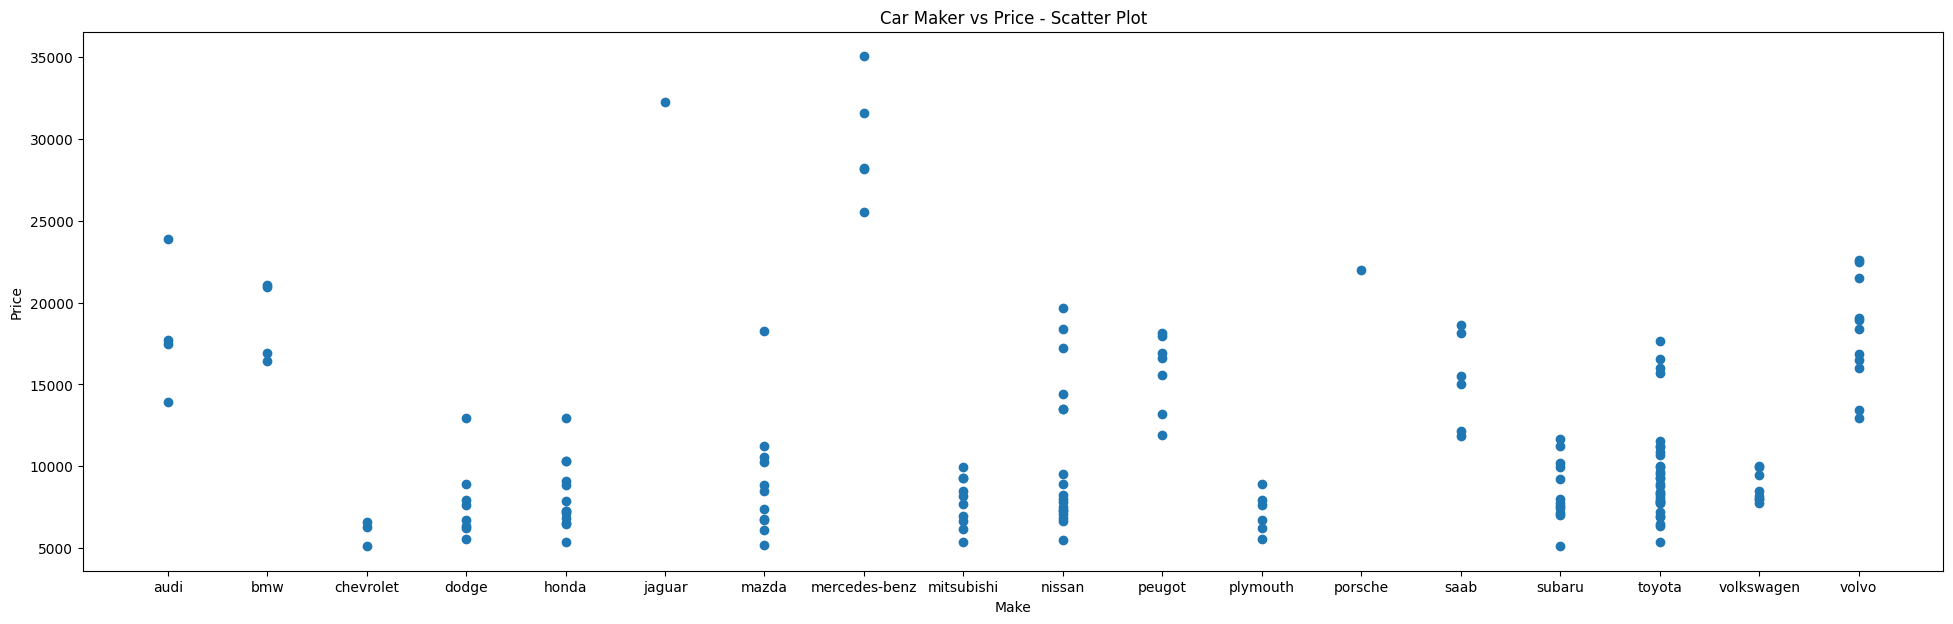

In [6]:
plt.figure(figsize=(24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car Maker vs Price - Scatter Plot')
plt.show()


Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

**A Better View: Statistical Plots with Seaborn**

To get more detailed insights, we'll use Seaborn. Seaborn excels at creating plots that summarize statistical information. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

### Here’s how to read it:
- The Box: Represents the central 50% of the data. This is called the Interquartile Range (IQR).
- The Line in the Box: This is the median (or 50th percentile), which represents the middle value of the data.
- The Whiskers: The lines extending from the box show the range of the rest of the data, typically excluding outliers.
- The Dots: Individual points outside the whiskers are considered outliers—unusually high or low values.

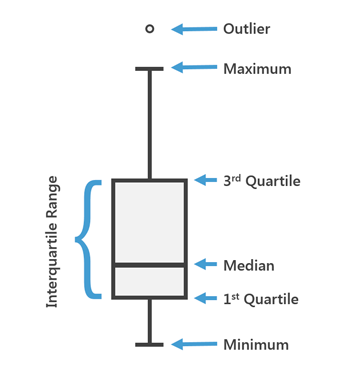

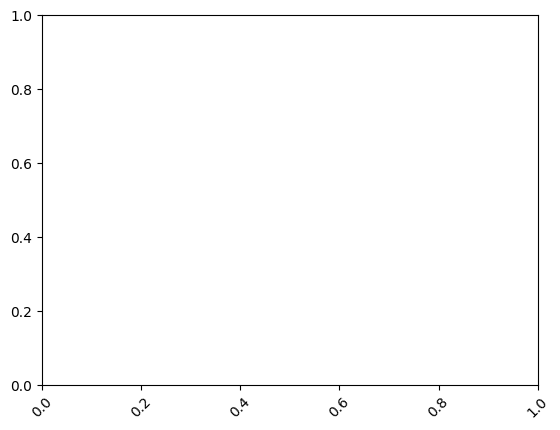

In [7]:
plt.xticks(rotation=45)
plt.show()


### Interpretation of the Box Plot

- **High-End Brands:**
  It's now crystal clear that **Mercedes-Benz, Jaguar, and Porsche** have the highest median prices. Their entire "boxes" are higher than most other brands, indicating consistently premium pricing.

- **Price Range:**
  Look at **BMW**—the box is very tall, meaning its prices are widely spread out. This suggests BMW offers a broad range of models, from more affordable to very expensive.

- **Outliers:**
  We can spot outliers easily. For example, there's a **Mazda, a Mitsubishi, and a Toyota** model priced significantly higher than the rest of their brand's lineup. This could be a high-performance sports model or a luxury vehicle.

**Conclusion:**
This single box plot gave us far more insight than the scatter plot, highlighting both central tendencies and variability within each brand.


**The Violin Plot: Box Plot + Density**

A Violin Plot is a powerful hybrid. It combines a box plot (visible in the center) with a Kernel Density Estimate (KDE) on each side. The KDE shows the distribution of the data—wider sections mean more data points are concentrated there, while narrower sections mean fewer.We can also use the Violin Plot to understand the distribution within each car maker in a better way.

It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.


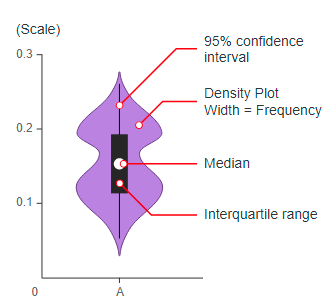

/tmp/ipython-input-97522228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"], y=y, palette="Set3").set_title('Car Maker vs Price - Violin Plot')


Text(0.5, 1.0, 'Car Maker vs Price - Violin Plot')

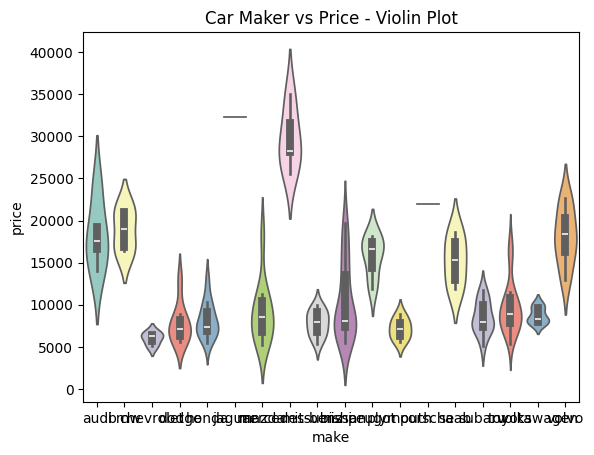

In [10]:
sns.violinplot(x=X["make"], y=y, palette="Set3").set_title('Car Maker vs Price - Violin Plot')



### Interpretation of the Violin Plot

- **Jaguar:**
  The violin is fairly narrow and centered high up, indicating that Mercedes' cars are **consistently expensive** with little price variation.

- **Nissan:**
  The violin is wide at the bottom and has a long tail, showing that most of Nissan's cars are **low-priced**, but they also have a few more expensive models.

**Conclusion:**
This plot gives us a much more **nuanced view** of the price distribution for each brand, revealing both concentration and spread of prices.


Another plot type are the **Swarm Plots** (Every Point Matters)

A Swarm Plot is like a scatter plot, but it adjusts the position of the points to prevent them from overlapping. This allows you to see the distribution while still plotting every single data point. It's great for smaller datasets where you want to see individual observations. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed;

Text(0.5, 1.0, 'Car Maker vs Price - Swarm Plot')

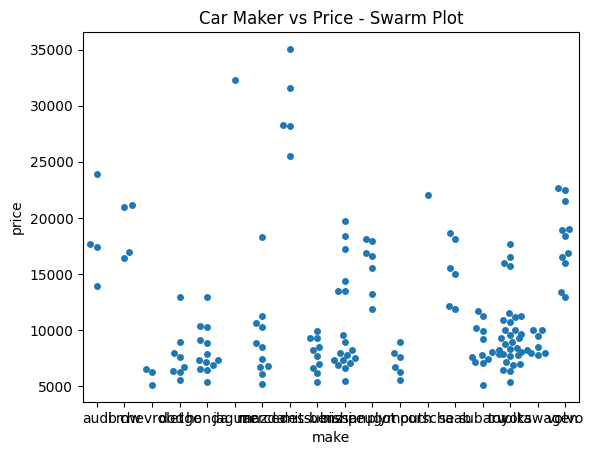

In [11]:
sns.swarmplot(x=X["make"], y=y).set_title('Car Maker vs Price - Swarm Plot')


**Note:** This plot can be slow and hard to read for very large datasets, but for our cleaned dataset of 159 cars, it works well.

Now let us try to learn a bit more about the various features in our dataset. One of the features is **Horsepower**, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

/tmp/ipython-input-1302102199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"], y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car Maker vs Horsepower - Box Plot')


Text(0.5, 1.0, 'Car Maker vs Horsepower - Box Plot')

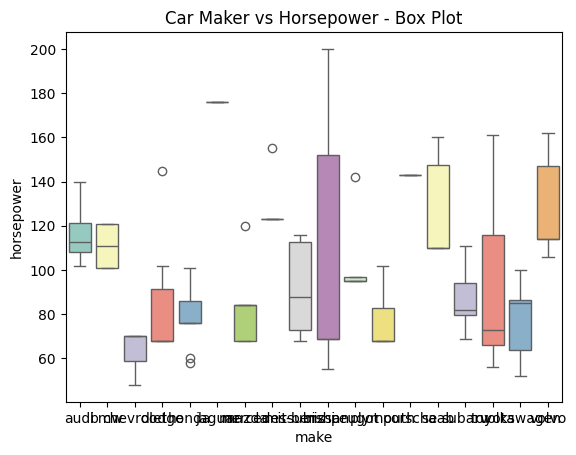

In [12]:
sns.boxplot(x=X["make"], y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car Maker vs Horsepower - Box Plot')


Interpretation:

As expected, Porsche and Jaguar lead the pack with very high horsepower cars. This confirms our intuition. Now, the next logical question is: does horsepower have a direct relationship with our target variable, **price**?

A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope.

<Axes: xlabel='horsepower', ylabel='price'>

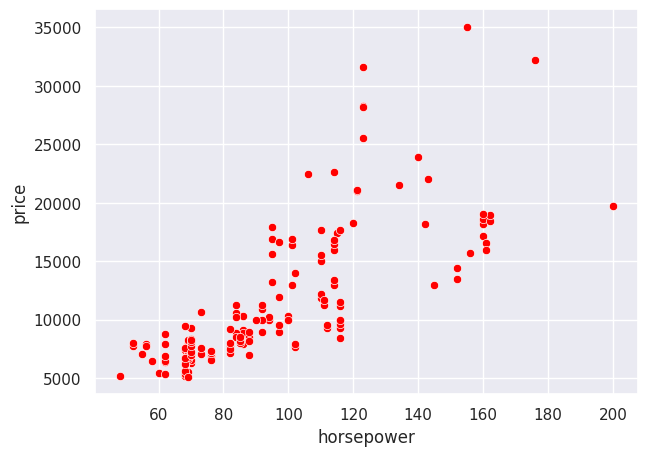

In [13]:
sns.set(rc={'figure.figsize': (7, 5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y=y, color="red")


A better way of plotting these correlations is using a **Jointplot** instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence).

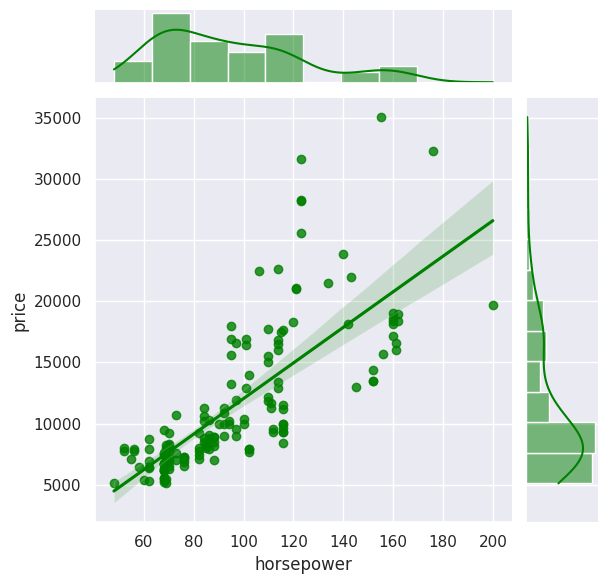

In [14]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y=y, kind="reg", color='green')


## Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

An example is shown below, with "highway-mpg" where MPG is miles per gallon.

### Hint: You should be using numeric features. The numeric features in the data are listed below:

'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'

#### You are motivated to try all of these features to better understand the dataset

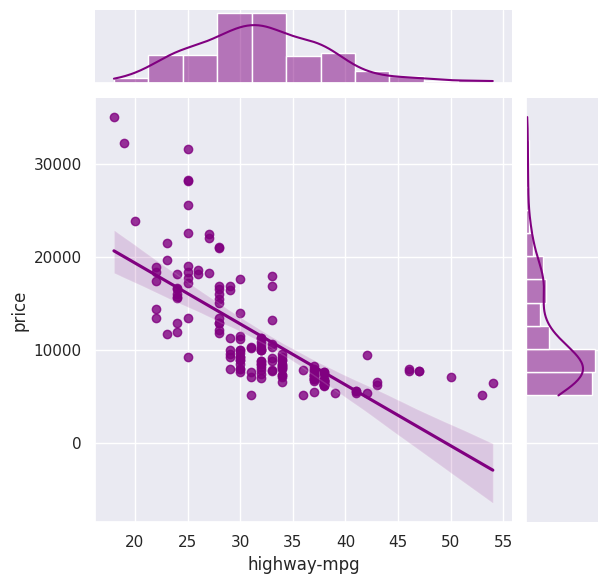

In [15]:
############################
### CHANGE THE CODE HERE ###
feature = "highway-mpg"
############################

sns.jointplot(x=pd.to_numeric(X[feature]), y=y, kind="reg", color='purple')


**Interpretation of highway-mpg vs. price:**

The regression line clearly slopes downwards. This indicates a negative correlation: cars with better fuel efficiency (higher MPG) tend to be less expensive. This makes perfect sense, as high-performance luxury cars often sacrifice fuel economy for power.

## Question: Interpreting Body Style vs. Price
Let's analyze the plot below, which shows the relationship between a car's body-style and its price.

Based on the plot, answer the following questions:

- Which body-type has the highest median price? Which one appears to be the "costliest" overall?
- Is looking only at the maximum value (the top whisker or outlier) a good way to determine the costliest body-style? Why is the interquartile range (the box) a better indicator?
- Do you think the body-style of a car could be a good predictor for its price? Why or why not?


/tmp/ipython-input-3215937346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"], y=y, palette="Set3").set_title('Body Style vs Price - Box Plot')


Text(0.5, 1.0, 'Body Style vs Price - Box Plot')

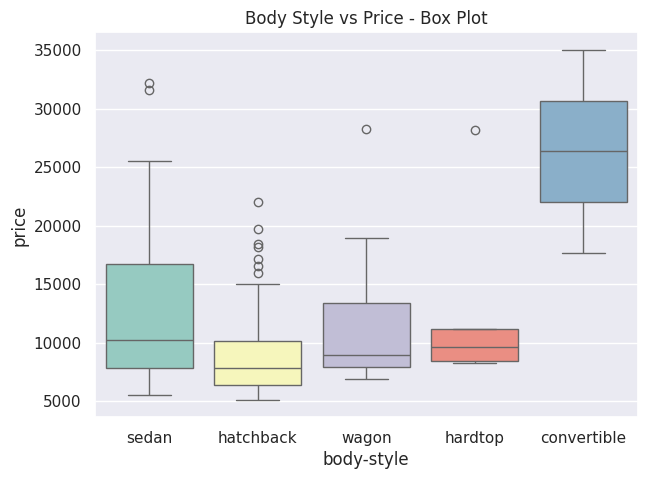

In [16]:
sns.boxplot(x=X["body-style"], y=y, palette="Set3").set_title('Body Style vs Price - Box Plot')


### Exercise
Often, you want to display multiple plots side-by-side to compare them. Matplotlib's plt.subplots() function is perfect for this. It creates a figure and a grid of subplots (axes).

**Task:** Choose any 2 plot types discussed above (e.g., a Box Plot and a Violin Plot) and plot them together in a single figure for body-style vs. price.


Go through the Seaborn documentation and find a plot type that has not been
demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

Some interesting references:


1) https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2) https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7


3) https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2








/tmp/ipython-input-2443211767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"], y=y, palette="Set3", ax=axes[0])
/tmp/ipython-input-2443211767.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["body-style"], y=y, palette="Set2", ax=axes[1])


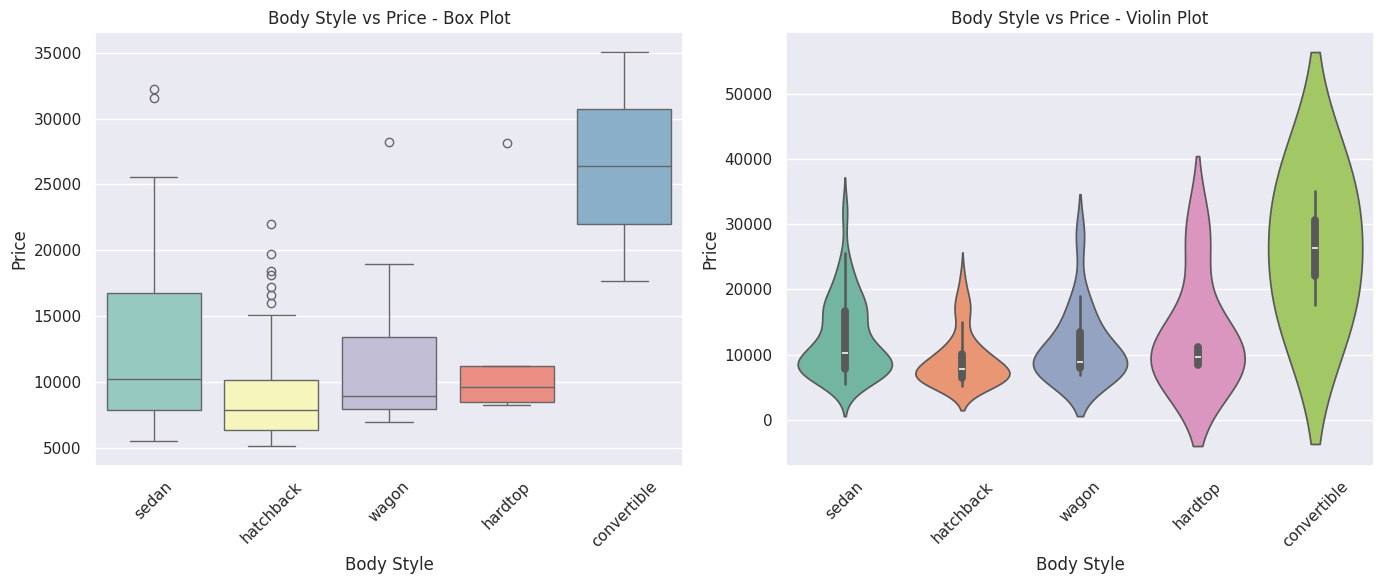

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot
sns.boxplot(x=X["body-style"], y=y, palette="Set3", ax=axes[0])
axes[0].set_title('Body Style vs Price - Box Plot')
axes[0].set_xlabel('Body Style')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)

# Violin Plot
sns.violinplot(x=X["body-style"], y=y, palette="Set2", ax=axes[1])
axes[1].set_title('Body Style vs Price - Violin Plot')
axes[1].set_xlabel('Body Style')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
